<a href="https://colab.research.google.com/github/1218muskan/DL-CV_IGDTUW/blob/main/SkinCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fetching Data from Kaggle

In [148]:
import json
kaggle = open('kaggle.json')   # opening JSON file
kaggle_dict = json.load(kaggle)     # reading JSON file as dictionary

In [ ]:
kaggle_dict

In [152]:
import os
os.environ['KAGGLE_USERNAME'] = kaggle_dict['username']
os.environ['KAGGLE_KEY'] = kaggle_dict['key']

In [ ]:
!kaggle datasets download fanconic/skin-cancer-malignant-vs-benign

 98% 319M/325M [00:03<00:00, 113MB/s]
100% 325M/325M [00:03<00:00, 96.7MB/s]


In [ ]:
# unzip the dataset fetched from kaggle
!unzip skin-cancer-malignant-vs-benign.zip

In [65]:
os.listdir('/content/train')

['malignant', 'benign']

Therefore, we have 2 separate folders for our targets :- Malignant and Bengin

In [66]:
len(os.listdir('train/malignant'))

1197

In [67]:
len(os.listdir('train/benign'))

1440

Hence, we have 1,197 malignant images and 1,440 benign images<br>
Data is balanced

## Displaying Images

In [68]:
import PIL
import numpy as np
import matplotlib.pyplot as plt

In [69]:
sample_img_malignant = PIL.Image.open('train/malignant/10.jpg')

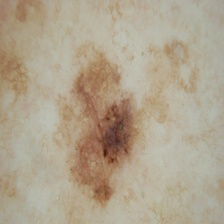

In [70]:
sample_img_malignant

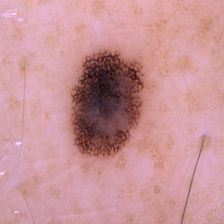

In [71]:
sample_img_benign = PIL.Image.open('train/benign/100.jpg')
sample_img_benign

In [72]:
sample_img_benign.size

(224, 224)

In [73]:
sample_img_malignant.size

(224, 224)

Its mentioned in the data description that each image is of 224*224 dimension

In [74]:
# Plotting subplot

def plot_images(images, target):
  plt.figure(figsize=(9,5))
  plt.suptitle(target, fontsize = 20)
  path = 'train/' + target

  for i in range(12):
    img = PIL.Image.open( path + '/' + images[i] )
    img = np.asarray(img)
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)

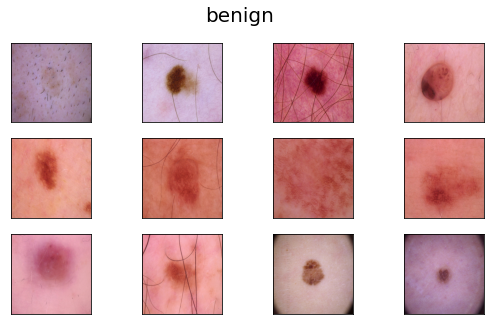

In [75]:
benign_images = os.listdir('train/benign')
plot_images(benign_images, 'benign')

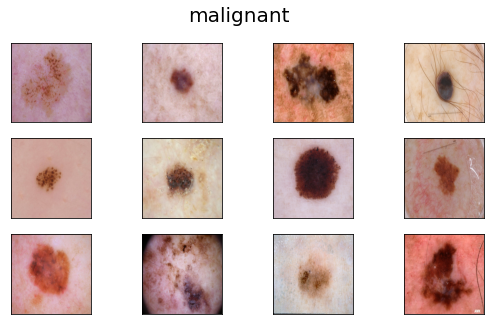

In [76]:
malignant_images = os.listdir('train/malignant')
plot_images(malignant_images, 'malignant')

## Loading Image Dataset

**Keras Image Data Generator**<br>
Official Documentation : https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator<br>
Nice Blog : https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

In [77]:
import keras

In [78]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
)

test_datagen = keras.preprocessing.image.ImageDataGenerator( rescale=1./255 )

In [90]:
train_generator = train_datagen.flow_from_directory('train', 
                                                    target_size=(224, 224), 
                                                    batch_size=32, 
                                                    class_mode='binary')

Found 2637 images belonging to 2 classes.


In [92]:
test_generator = test_datagen.flow_from_directory('test',
                                                  target_size=(224, 224), 
                                                  batch_size=32, 
                                                  class_mode='binary')

Found 660 images belonging to 2 classes.


- Training Images = 2,637
- Test Images = 660

## Building CNN Model

In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [93]:
model = Sequential([
    Conv2D(32, 3, input_shape = (224,224,3), activation='relu'),  
    MaxPooling2D(),          
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(8, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

In [94]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 109, 109, 16)      4624      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 54, 54, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 52, 52, 8)         1160      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 26, 26, 8)       

In [95]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [97]:
model.fit(train_generator, epochs = 5, validation_data = test_generator)

Epoch 1/5
83/83 [==============================] - 152s 2s/step - loss: 0.3883 - accuracy: 0.8066 - val_loss: 0.3756 - val_accuracy: 0.8182
Epoch 2/5
83/83 [==============================] - 153s 2s/step - loss: 0.3762 - accuracy: 0.8172 - val_loss: 0.3984 - val_accuracy: 0.8152
Epoch 3/5
83/83 [==============================] - 151s 2s/step - loss: 0.3960 - accuracy: 0.8093 - val_loss: 0.3641 - val_accuracy: 0.8212
Epoch 4/5
83/83 [==============================] - 152s 2s/step - loss: 0.3489 - accuracy: 0.8377 - val_loss: 0.3868 - val_accuracy: 0.8167
Epoch 5/5
83/83 [==============================] - 152s 2s/step - loss: 0.3450 - accuracy: 0.8278 - val_loss: 0.3518 - val_accuracy: 0.8288


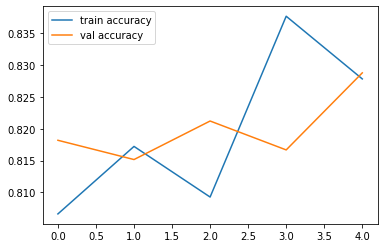

In [98]:
# Plotting Accuracy
plt.plot(model.history.history['accuracy'], label='train accuracy')
plt.plot(model.history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

## Making Predictions

In [105]:
import cv2

In [139]:
test_sample = []

for i in range(5):
  test_img = cv2.imread('test/benign/' + os.listdir('test/benign/')[i])
  test_sample.append(test_img)

for i in range(5):
  test_img = cv2.imread('test/malignant/' + os.listdir('test/malignant/')[i])
  test_sample.append(test_img)

In [140]:
test_sample = np.asarray(test_sample)
test_sample.shape

(10, 224, 224, 3)

In [141]:
prediction = model.predict(test_sample)
prediction

array([[0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.3709068e-04],
       [0.0000000e+00],
       [5.4636654e-08],
       [0.0000000e+00]], dtype=float32)